<a href="https://colab.research.google.com/github/karthik-kummari/resturant-prediction/blob/main/resturant%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Dataset .csv to Dataset .csv
Missing values in the dataset:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Columns after encoding:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Restaurant Name_#Dilliwaala6', 'Restaurant Name_#InstaFreeze',
       ...
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rat

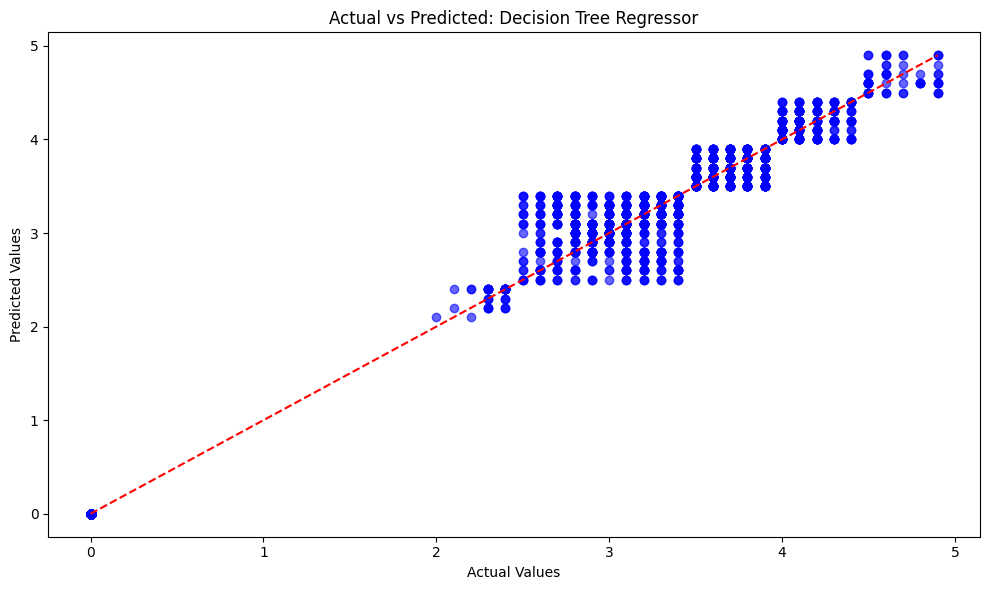

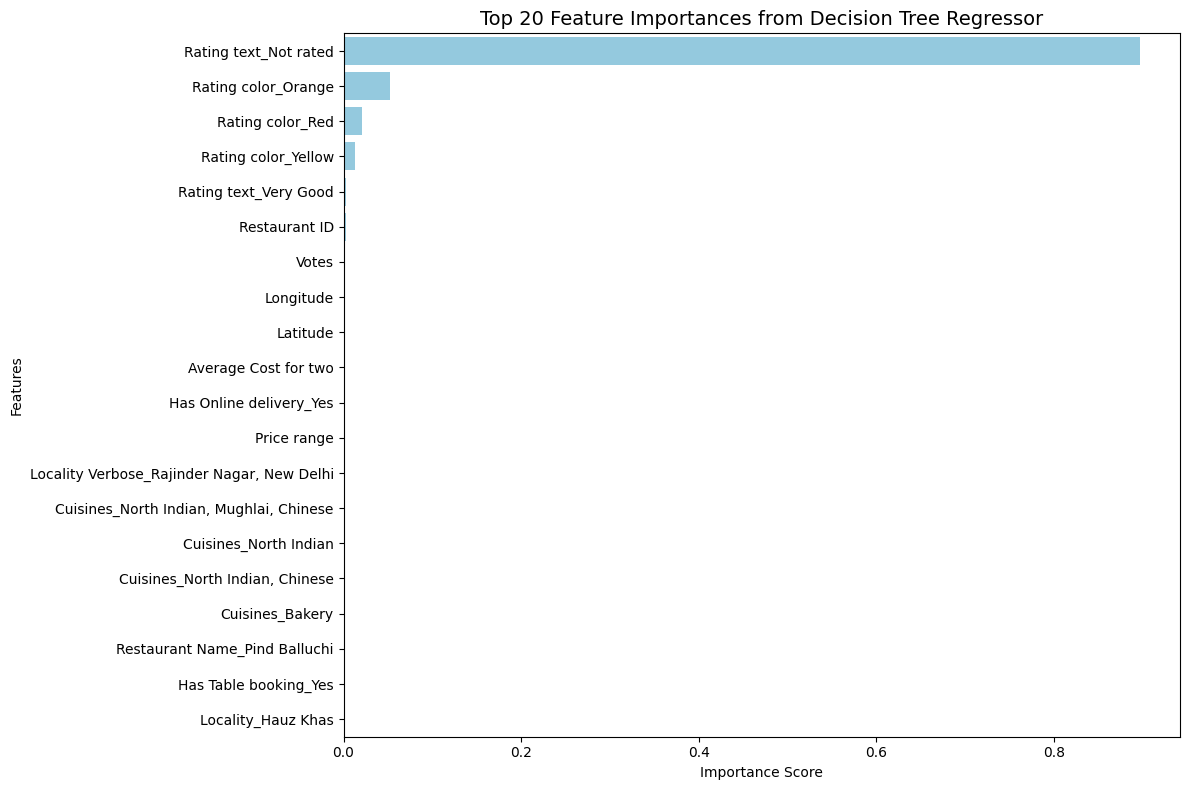

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Dataset .csv')

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the columns after dummy encoding
print("Columns after encoding:")
print(df.columns)

# Separate features and target variable
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted: Decision Tree Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()
plt.show()

# Calculate and visualize feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and select top 20 features based on importance
top_importances = importances.sort_values(ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances.values, y=top_importances.index, color='skyblue')
plt.title("Top 20 Feature Importances from Decision Tree Regressor", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
